In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
df = pd.read_csv("data/salaries_25_04_2022.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Analyst,20000,USD,20000,GR,100,GR,S
1,2021,SE,FT,Head of Data,87000,EUR,102839,SI,100,SI,L
2,2022,SE,FT,Head of Data,200000,USD,200000,MY,100,US,M
3,2022,EN,FT,Data Scientist,66500,CAD,52570,CA,100,CA,L
4,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M


## Number of respondents/features

In [3]:
df.shape

(326, 11)

## For the sake of simplicity, let's remove local currency salaries

In [4]:
df.drop(columns=['salary', 'salary_currency'], inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Analyst,20000,GR,100,GR,S
1,2021,SE,FT,Head of Data,102839,SI,100,SI,L
2,2022,SE,FT,Head of Data,200000,MY,100,US,M
3,2022,EN,FT,Data Scientist,52570,CA,100,CA,L
4,2022,MI,FT,Data Scientist,78000,US,100,US,M


## Count missing values

In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Some features description:  
- experience_level
    - EN - Entry-level / Junior
    - MI - Mid-level / Intermediate
    - SE - Senior-level / Expert
    - EX - Executive-level / Director
- employment_type
    - PT - Part-time
    - FT - Full-time
    - CT - Contract
    - FL - Freelance
- remote_ratio
    - 0 - No remote work (less than 20%)
    - 50 - Partially remote
    - 100 - Fully remote (more than 80%)

## Pies

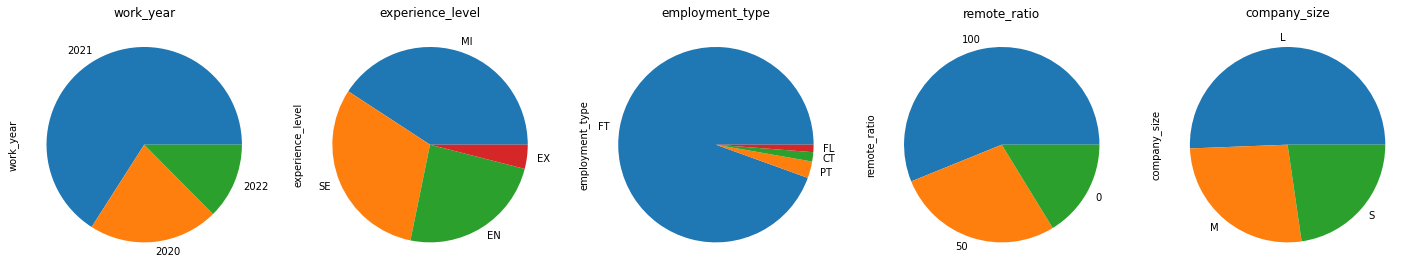

In [72]:
cat_features = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
fig, ax = plt.subplots(1, len(cat_features), figsize=(20, 20))
fig.tight_layout()

for i, feature in enumerate(cat_features):
    df[feature].value_counts(normalize=True).plot(kind='pie', title=feature, ax=ax[i])

## _employee_residence_ and _company_location_

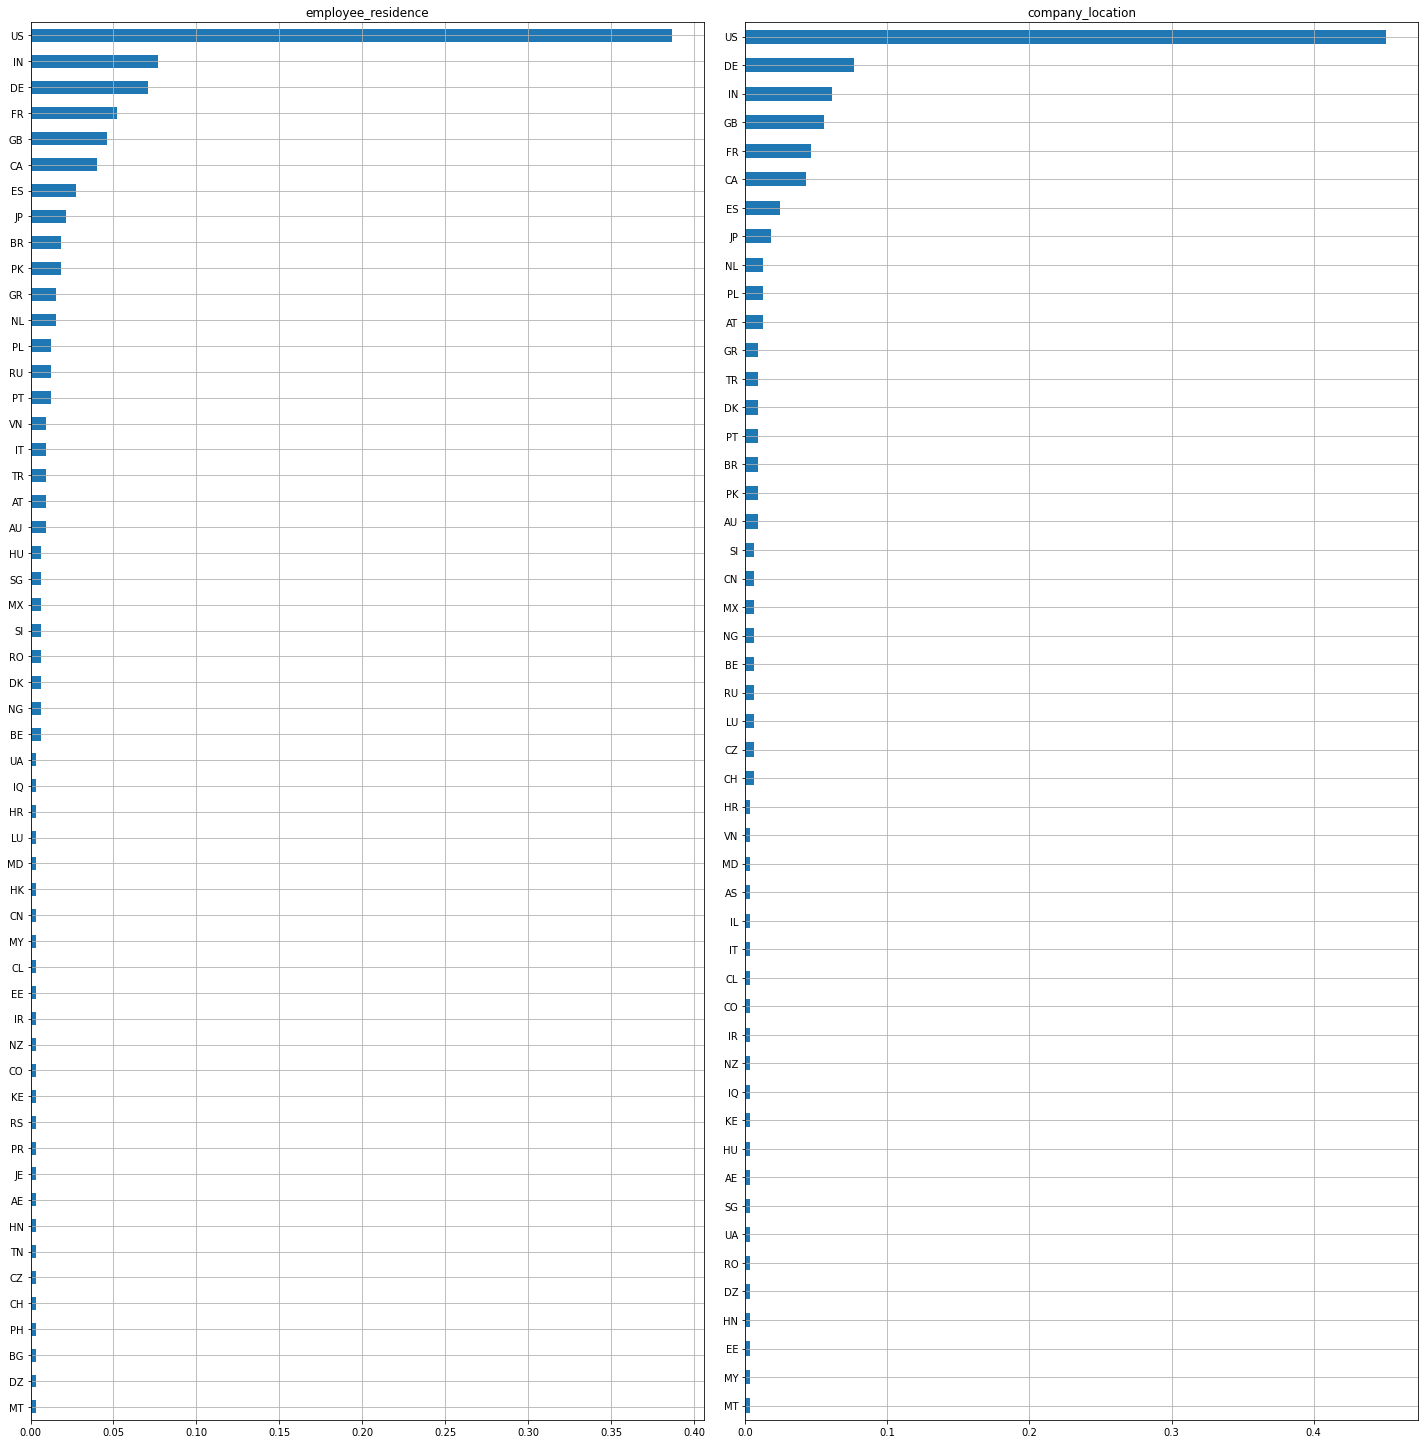

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.tight_layout()

df.employee_residence.value_counts(normalize=True).plot(kind='barh', title='employee_residence', ax=ax[0])
ax[0].invert_yaxis()
ax[0].grid()
df.company_location.value_counts(normalize=True).plot(kind='barh', title='company_location', ax=ax[1])
ax[1].invert_yaxis()
ax[1].grid()

## Salary in USD

In [6]:
df["salary_in_usd"].describe()

count       326.000000
mean     100493.527607
std       80979.780235
min        2859.000000
25%       48411.500000
50%       83872.000000
75%      130606.500000
max      600000.000000
Name: salary_in_usd, dtype: float64

## Graphic represenation

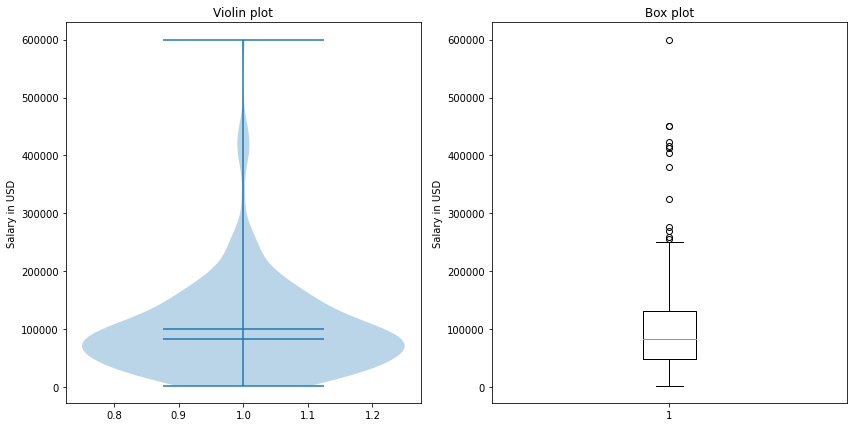

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

axs[0].violinplot(df.salary_in_usd, showmeans=True, showmedians=True)
axs[0].set_title('Violin plot')
axs[1].boxplot(df.salary_in_usd)
axs[1].set_title('Box plot')

for ax in axs:
    ax.set_ylabel('Salary in USD')

plt.show()

## Salary in USD per year

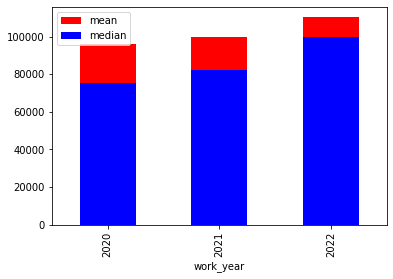

In [8]:
ax = df.groupby('work_year')['salary_in_usd'].mean().plot.bar(color='red')
df.groupby('work_year')['salary_in_usd'].median().plot.bar(ax=ax, color='blue')
ax.legend(['mean', 'median'])